In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


### Lets see if we can determine the energy deposited in the calorimeter from these eCaloE entries

____

In [2]:
f = r.TFile("./data/gm2offline_ana_18398265_1544564276.1650.root")
f = r.TFile("./data/results_40M_gasGun_May1.root")
t = f.Get("SimuTreeMaker").Get("gm2ringsimTree")
t.Print()

******************************************************************************
*Tree    :gm2ringsimTree: gm2ringsimTree                                         *
*Entries : 39960000 : Total =     23789293449 bytes  File  Size = 10443385936 *
*        :          : Tree compression factor =   2.28                       *
******************************************************************************
*Br    0 :runNum    : runNum/I                                               *
*Entries : 39960000 : Total  Size=  160101311 bytes  File Size  =    1123947 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.40     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/I                                            *
*Entries : 39960000 : Total  Size=  160108925 bytes  File Size  =    1125578 *
*Baskets :     2534 : Basket Size=    1038848 bytes  Compression= 142.20     *
*..............................................

---

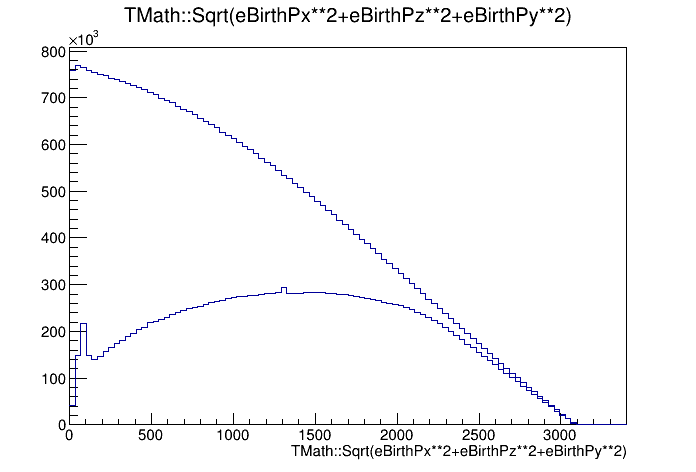

In [4]:
c = r.TCanvas()
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2)","","") 
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2)","eCaloNum > 0","same") 
c.Draw()

### There is clearly a difference in the birth energy overall vs. that of what hits the calorimeter, but what about the difference from what the calorimeter sees to the birth?

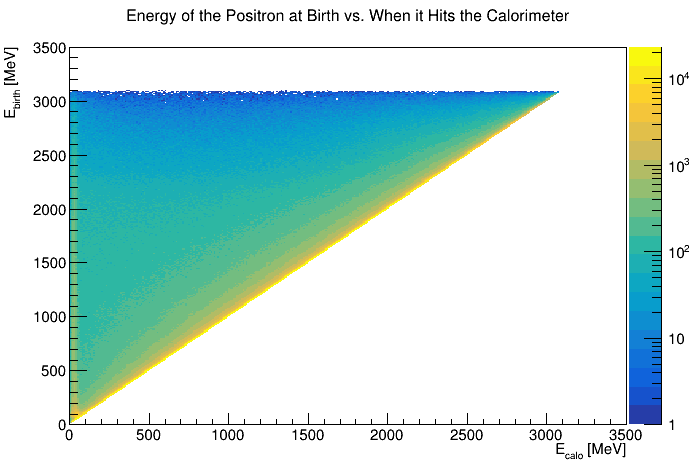

In [4]:
c = r.TCanvas()

h = r.TH2D("h","Energy of the Positron at Birth vs. When it Hits the Calorimeter; E_{calo} [MeV]; E_{birth} [MeV]",350,0,3500,350,0,3500)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2):eCaloE[0]>>h","eCaloFlag == 0","goff")

h.Draw("colz")
c.SetLogz()

c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


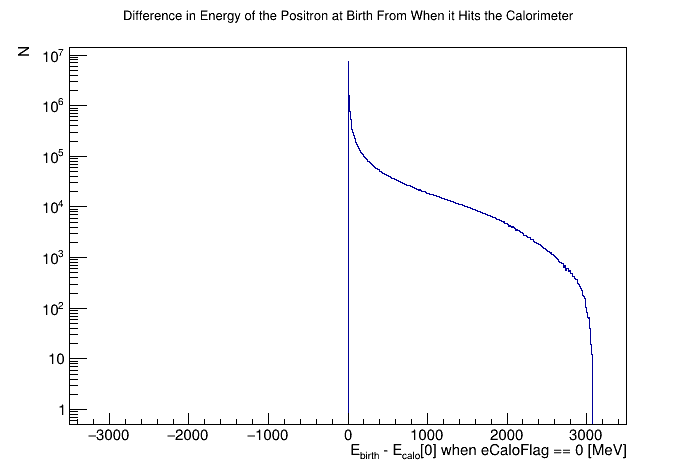

In [5]:
c = r.TCanvas()

h2 = r.TH1D("h","Difference in Energy of the Positron at Birth From When it Hits the Calorimeter; E_{birth} - E_{calo}[0] when eCaloFlag == 0 [MeV]; N",700,-3500,3500)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - eCaloE[0]>>h","eCaloFlag == 0","goff")

h2.Draw("colz")
c.SetLogy()

c.Draw()

---

### Can we figure out where this is coming from predominantly? Is it in a kicker/collimator region? Trackers?

In [9]:
roughThetas = [0.11272777572964064, 0.38704268778924433, 0.630334955791008, 0.9882987408784784, 1.1718751132875604, 1.435603925064294, 1.6943768479695187, 1.9531923566210057, 2.2134087184367677, 2.475283362118464, 2.7397174588150497, 2.9979804262428855, 3.272053406490232, 3.606752905906422, 3.790081889744413, 4.047968629057927, 4.3078791723918215, 4.654521173053848, 4.8274337538242085, 5.102626352202925, 5.339031467575712, 5.607840660438622, 5.884482084626629, 6.138585371556525]
thetaTF1vec = []
for i in range(len(roughThetas)):
    fi = r.TF1("f"+str(i),str(roughThetas[i]),0,3000)
    thetaTF1vec.append( fi.Clone("f"+str(i)) )
    
print(thetaTF1vec)

[<ROOT.TF1 object ("f0") at 0x7f21d8d859d0>, <ROOT.TF1 object ("f1") at 0x7f21d8d31780>, <ROOT.TF1 object ("f2") at 0x7f21d8e34ae0>, <ROOT.TF1 object ("f3") at 0x7f21d8e30310>, <ROOT.TF1 object ("f4") at 0x7f21d8e5e920>, <ROOT.TF1 object ("f5") at 0x7f21d8e30ca0>, <ROOT.TF1 object ("f6") at 0x7f21d8e64120>, <ROOT.TF1 object ("f7") at 0x7f21d8e73290>, <ROOT.TF1 object ("f8") at 0x7f21d8e6a470>, <ROOT.TF1 object ("f9") at 0x7f21d8e753f0>, <ROOT.TF1 object ("f10") at 0x7f21d8e3a870>, <ROOT.TF1 object ("f11") at 0x7f21d8e50a60>, <ROOT.TF1 object ("f12") at 0x7f21d8e65910>, <ROOT.TF1 object ("f13") at 0x7f21d89d6840>, <ROOT.TF1 object ("f14") at 0x7f21d89d6c60>, <ROOT.TF1 object ("f15") at 0x7f21d8e7baf0>, <ROOT.TF1 object ("f16") at 0x7f21e06899b0>, <ROOT.TF1 object ("f17") at 0x7f21d89da520>, <ROOT.TF1 object ("f18") at 0x7f21d89dfe70>, <ROOT.TF1 object ("f19") at 0x7f21d8e767a0>, <ROOT.TF1 object ("f20") at 0x7f21d8e61670>, <ROOT.TF1 object ("f21") at 0x7f21d89dee40>, <ROOT.TF1 object ("

Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).


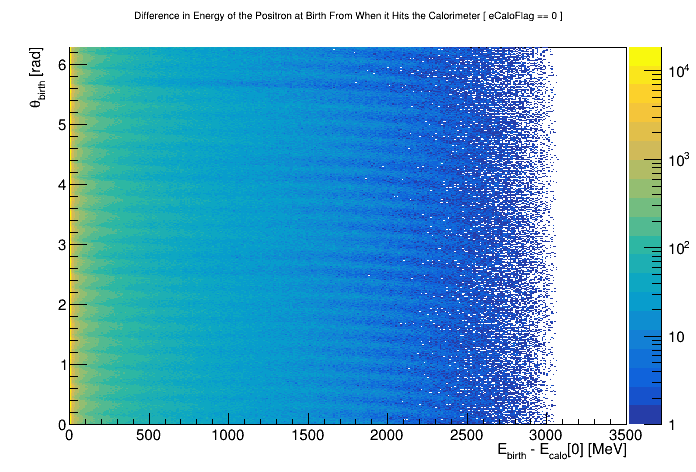

In [166]:
c = r.TCanvas()

h3 = r.TH2D("h3","Difference in Energy of the Positron at Birth From When it Hits the Calorimeter [ eCaloFlag == 0 ]; E_{birth} - E_{calo}[0] [MeV]; #theta_{birth} [rad]",350,0,3500,630,0,2*r.TMath.Pi())
t.Draw("eBirthTheta:TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - eCaloE[0]>>h3","eCaloFlag == 0","goff")

h3.Draw("colz")
c.SetLogz()

c.Draw()

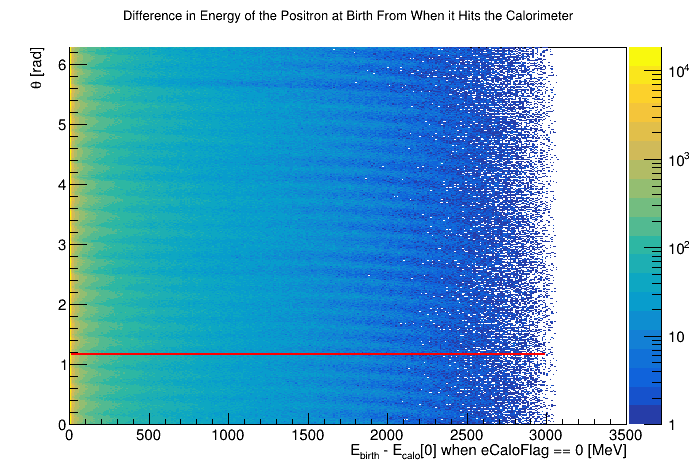

In [165]:
c = r.TCanvas()

h3.Draw("colz")

for i in range(len(thetaTF1vec)):
    if(i == 4):
        thetaTF1vec[i].Draw("same")

c.SetLogz()

c.Draw()

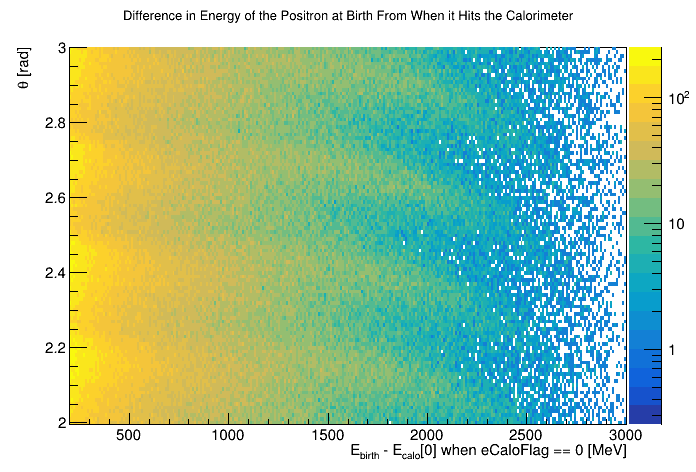

In [7]:
c = r.TCanvas()

h3.GetXaxis().SetRangeUser(200,3000)
h3.GetYaxis().SetRangeUser(2,3)
h3.Draw("colz")
c.SetLogz()

c.Draw()

In [8]:
h5 = r.TH2D("h5","Difference in Energy of the Positron at Birth From When it Hits the Calorimeter [Calo 8 Only]; E_{birth} - E_{calo}[0] when eCaloFlag == 0 [MeV]; #theta_{e-birth} [rad]",350,0,3500,630,0,2*r.TMath.Pi())
t.Draw("eBirthTheta:TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - eCaloE[0]>>h5","eCaloFlag == 0 && eCaloNum == 8","goff")

777331

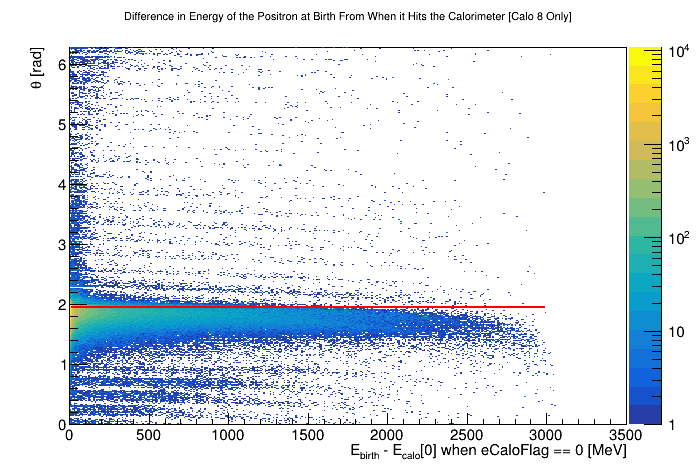

In [10]:
c = r.TCanvas()

h5.Draw("colz")
c.SetLogz()

calo = 8
for i in range(len(thetaTF1vec)):
    if i == calo - 1:
        thetaTF1vec[i].Draw("same")

c.Draw()

---

### Lets see if we can fit this oscillitory signal

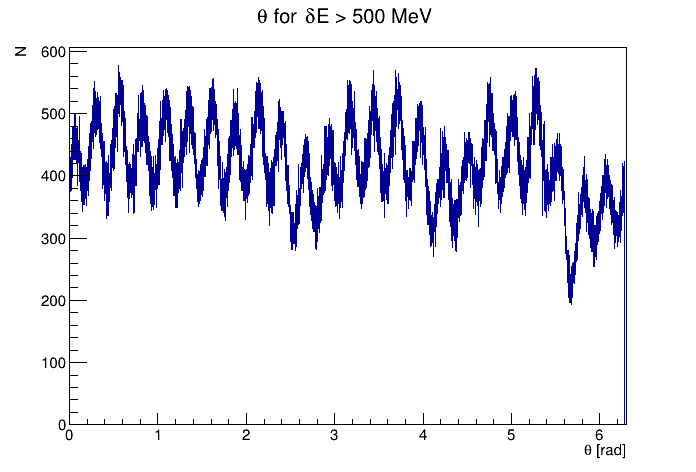

In [11]:
c = r.TCanvas()

h4 = r.TH1D("h4","#theta for #deltaE > 500 MeV; #theta [rad]; N",6300,0,6.3)
t.Draw("eBirthTheta>>h4","eCaloFlag == 0 && TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - eCaloE[0] > 500","goff")

h4.Draw("colz")
c.SetLogz()

c.Draw()

In [79]:
eStep = 500
eRange = [x for x in range(250,3000,eStep)]
print(eRange)

histVec = []

for i in range(len(eRange)):
    eLow = eRange[i]
    eHigh = eLow + eStep
    
    binLow = h3.GetXaxis().FindBin(eLow)
    binHigh = h3.GetXaxis().FindBin(eHigh - 1)
    
    print(binLow,binHigh)
    
    hi = h3.ProjectionY("",binLow,binHigh)
    hi.SetTitle("Projection of #deltaE vs. #theta [ "+str(eLow)+" < #deltaE < "+str(eHigh)+" MeV]")
    
    histVec.append( hi.Clone("h"+str(i)) )

[250, 750, 1250, 1750, 2250, 2750]
26 75
76 125
126 175
176 225
226 275
276 325


In [80]:
print(histVec)

[<ROOT.TH1D object ("h0") at 0x7f21d6d59950>, <ROOT.TH1D object ("h1") at 0x7f21d6d80b10>, <ROOT.TH1D object ("h2") at 0x7f21d8b1fee0>, <ROOT.TH1D object ("h3") at 0x7f21d6dacf30>, <ROOT.TH1D object ("h4") at 0x7f21d8a01d30>, <ROOT.TH1D object ("h5") at 0x7f21d8af7eb0>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


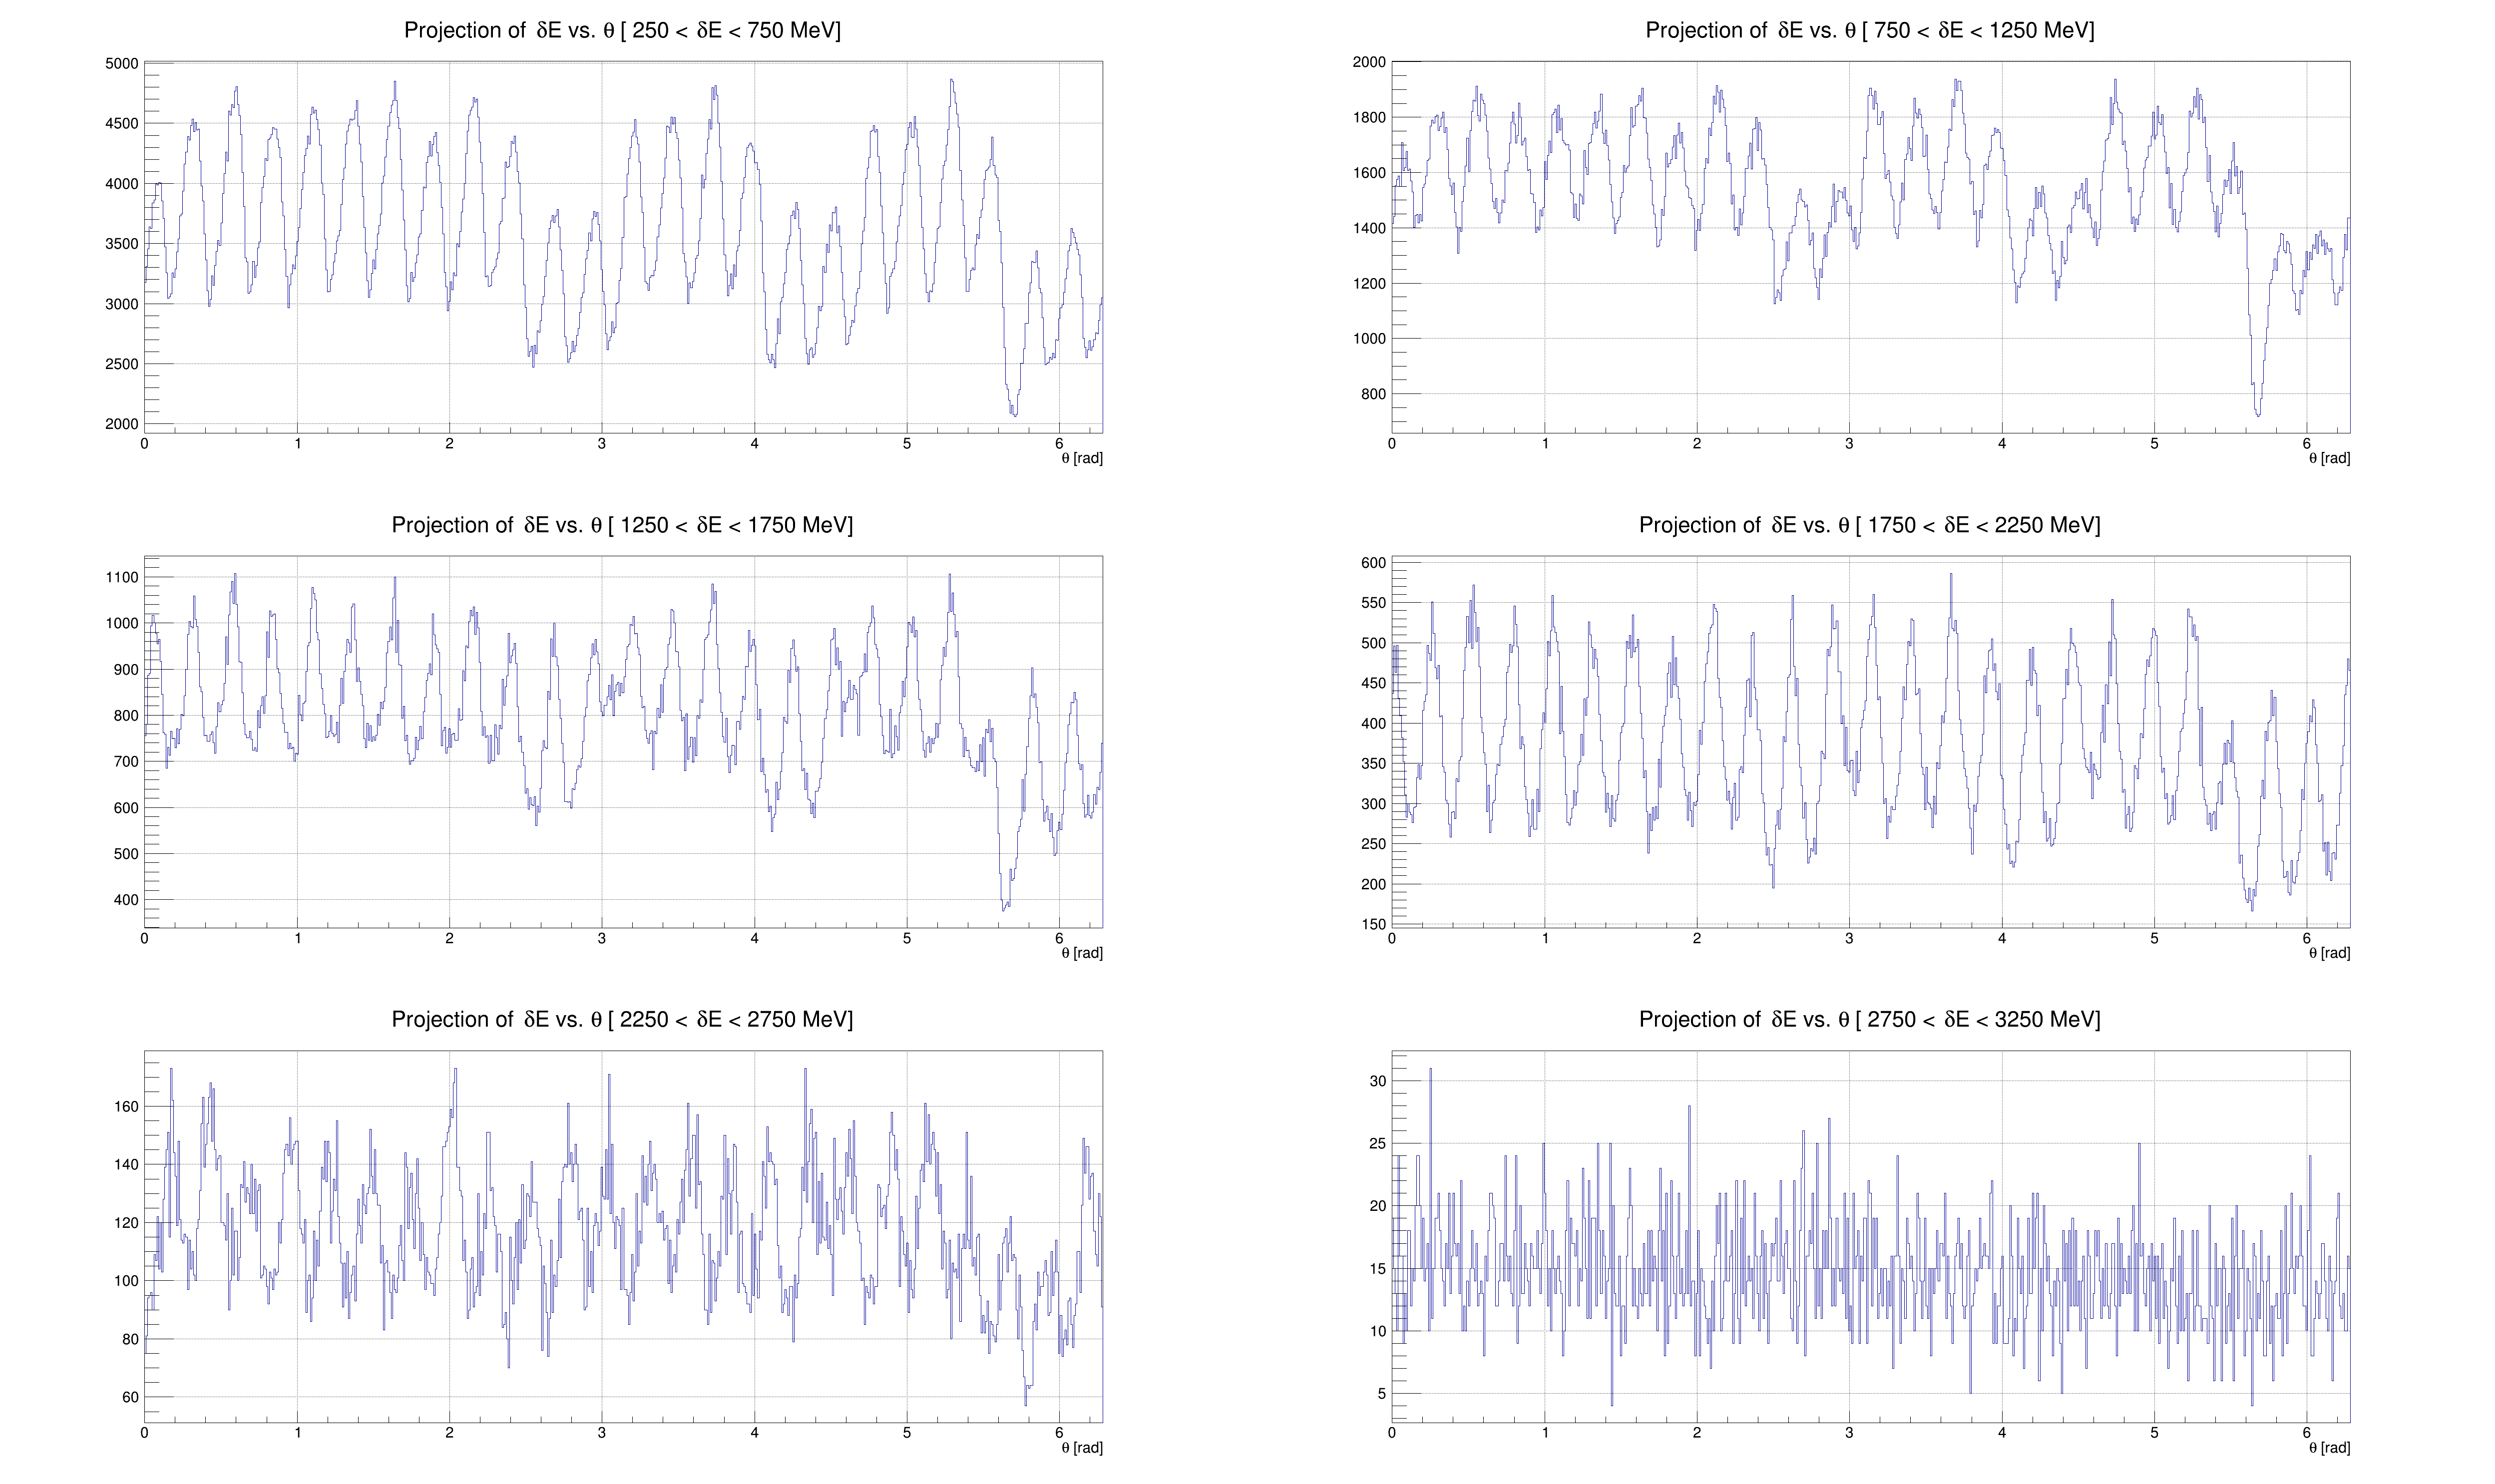

In [81]:
c = r.TCanvas("c","c",5000,3000)
height = 3
width = int(np.ceil(len(histVec)/height))
c.Divide(width,height)
for i, h in enumerate(histVec):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetGrid()
c.Draw()

In [82]:
histVecScaled = []
for h in histVec:
    h2 = h.Clone()
    h2.Scale(1/h2.GetEntries())
    histVecScaled.append(h2.Clone("hScaled_"+str(i)))

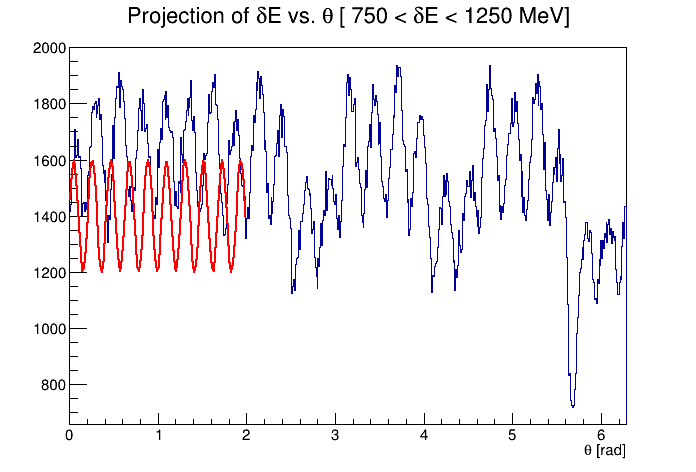

In [83]:
fsine = r.TF1("fsine","[0] + [1]*TMath::Sin( [2]*x + [3] )",0,2)
fsine.SetParameters(1400,200,30,0)

fsine.SetParLimits(3, 0, 2*r.TMath.Pi() )

c = r.TCanvas()
histVec[1].Draw()

fsine.Draw("SAME")

c.Draw()

In [87]:
parsVec = []
for i, h in enumerate(histVec):
    for j in range(2):
        h.Fit("fsine","R")
    parsVec.append( [fsine.GetParameter(i) for i in range(4)])

 FCN=2585.47 FROM MIGRAD    STATUS=CONVERGED     171 CALLS         172 TOTAL
                     EDM=1.62381e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.82542e+03   4.36226e+00   1.07717e-01   2.14836e-04
   2  p1          -6.71627e+02   6.13436e+00   1.51578e-01  -4.01936e-05
   3  p2           2.41123e+01   1.69656e-02   1.88764e-04   1.04976e-02
   4  p3           3.31696e+00   2.04861e-02   7.26956e-05  -2.58262e-01
 FCN=2585.47 FROM MIGRAD    STATUS=CONVERGED      44 CALLS          45 TOTAL
                     EDM=8.80069e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.82542e+03   4.36227e+00   1.07717e-01   1.29176e-05
   2  p1          -6.71626e+02   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


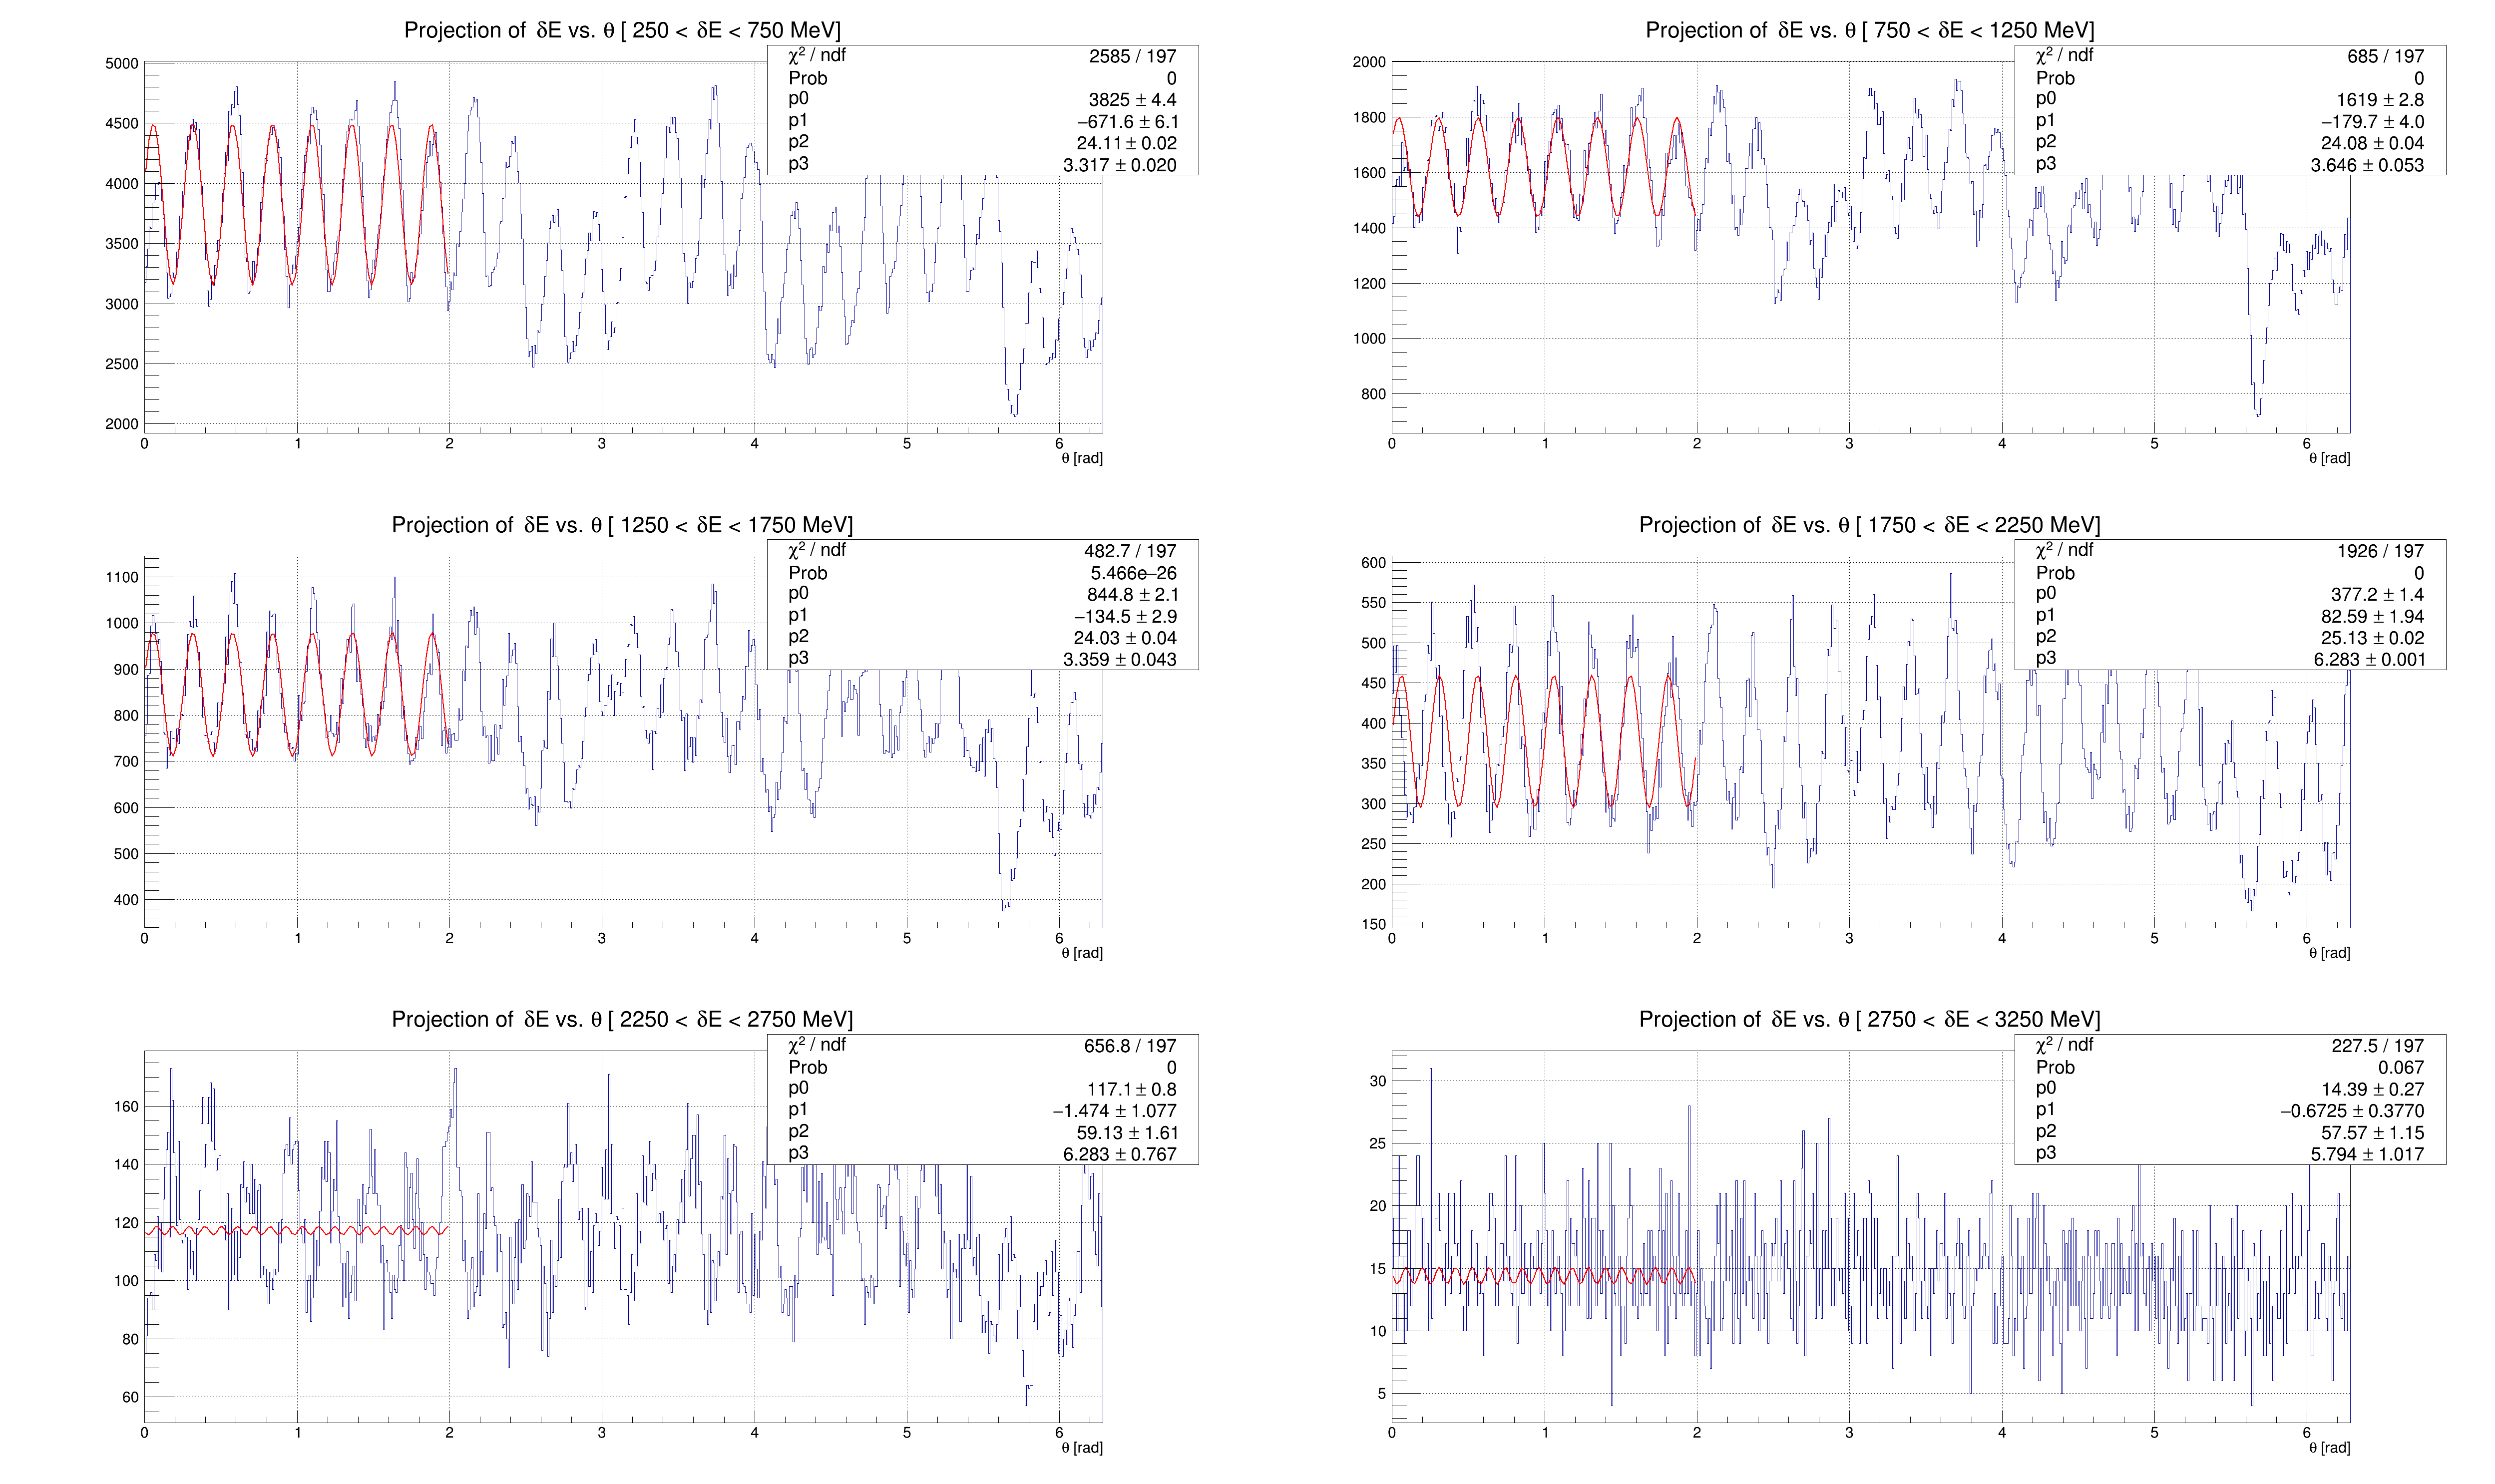

In [88]:
c = r.TCanvas("c","c",5000,3000)
height = 3
width = int(np.ceil(len(histVec)/height))
c.Divide(width,height)
for i, h in enumerate(histVec):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetGrid()
c.Draw()

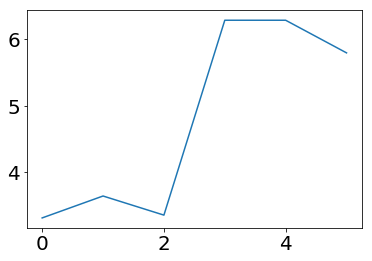

In [89]:
p0s, p1s, p2s, p3s = zip(*parsVec)
plt.plot(p3s)
plt.show()

---

### Now can we compare the xtal records to the eCaloE records?

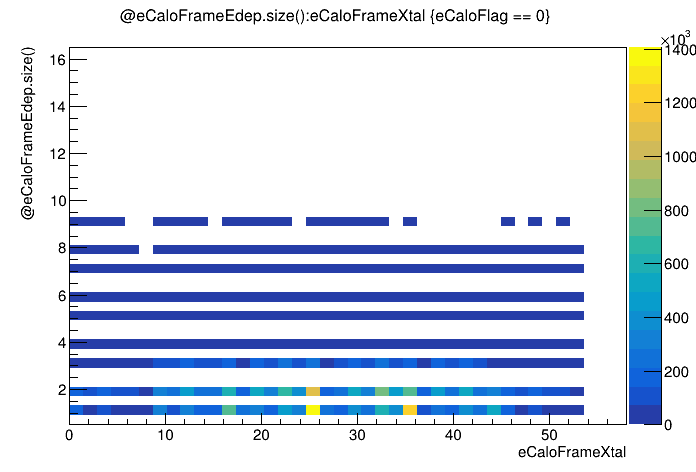

In [102]:
c = r.TCanvas()
t.Draw("@eCaloFrameEdep.size():eCaloFrameXtal","eCaloFlag == 0","colz")
c.Draw()

In [1]:
c = r.TCanvas()

t.Draw("Sum$(eCaloFrameE)","eCaloFlag == 0","colz")

c.SetLogy()
c.Draw()

NameError: name 'r' is not defined

Warning in <TFile::Append>: Replacing existing TH1: h6 (Potential memory leak).


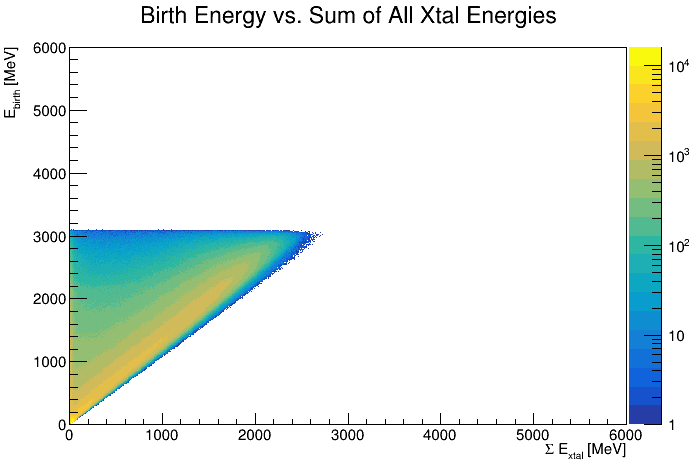

In [121]:
c = r.TCanvas()

h6 = r.TH2D("h6","Birth Energy vs. Sum of All Xtal Energies; #Sigma E_{xtal} [MeV]; E_{birth} [MeV]",600,0,6000,600,0,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2):Sum$(eCaloFrameEdep)>>h6","eCaloFlag == 0","goff")
h6.Draw("colz")

c.SetLogz()
c.Draw()

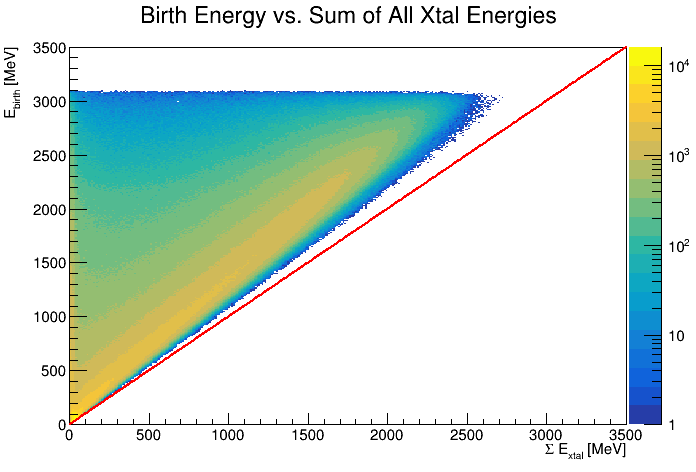

In [125]:
c = r.TCanvas()

h6.Draw("colz")

h6.GetXaxis().SetRangeUser(0,3500)
h6.GetYaxis().SetRangeUser(0,3500)

fone = r.TF1("fone","x",0,6000)
fone.SetLineColor(2)
fone.SetLineStyle(8)
fone.SetNpx(2000)
fone.Draw("SAME")

c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h7 (Potential memory leak).


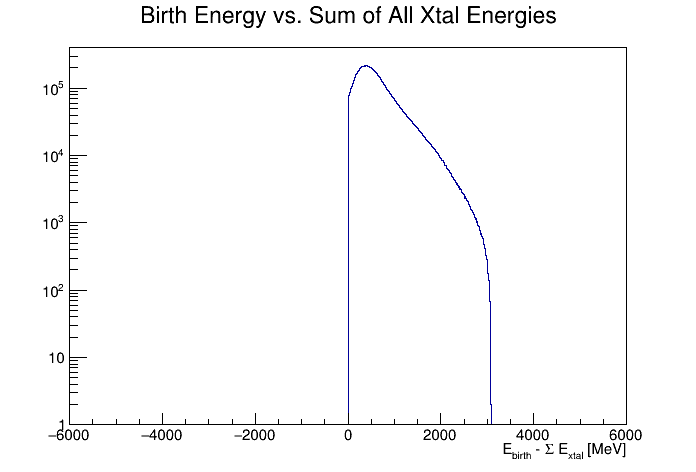

In [122]:
c = r.TCanvas()

h7 = r.TH1D("h7","Birth Energy vs. Sum of All Xtal Energies;  E_{birth} - #Sigma E_{xtal} [MeV]",1200,-6000,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep)>>h7","eCaloFlag == 0","goff")
h7.Draw("colz")

c.SetLogy()
c.Draw()

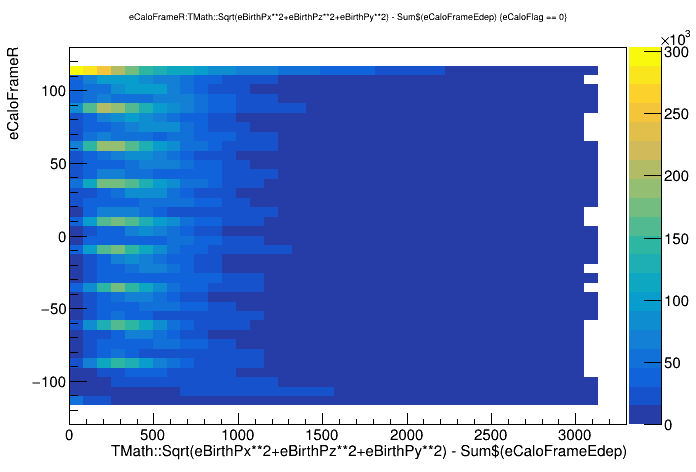

In [5]:
c = r.TCanvas()

t.Draw("eCaloFrameR:TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep)","eCaloFlag == 0","colz")

c.Draw()

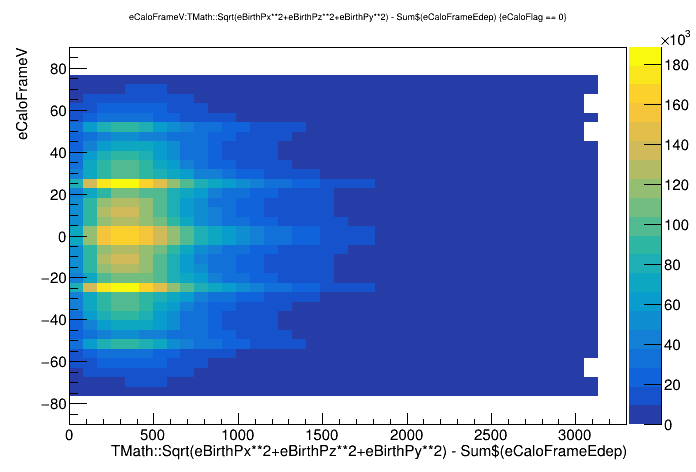

In [5]:
c = r.TCanvas()

t.Draw("eCaloFrameV:TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep)","eCaloFlag == 0","colz")

c.Draw()

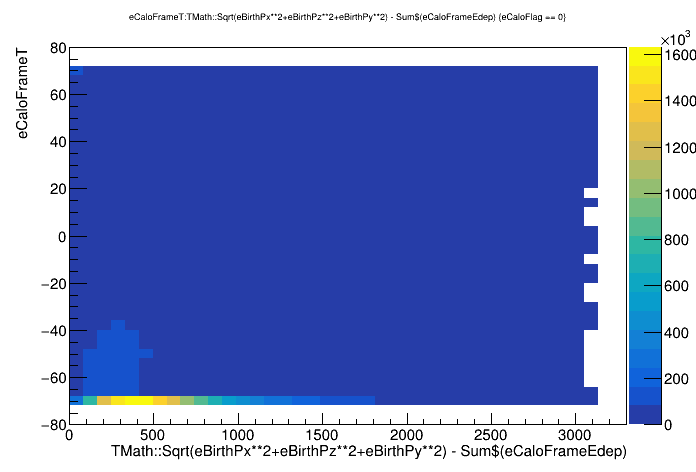

In [6]:
c = r.TCanvas()

t.Draw("eCaloFrameT:TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep)","eCaloFlag == 0","colz")

c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h7 (Potential memory leak).


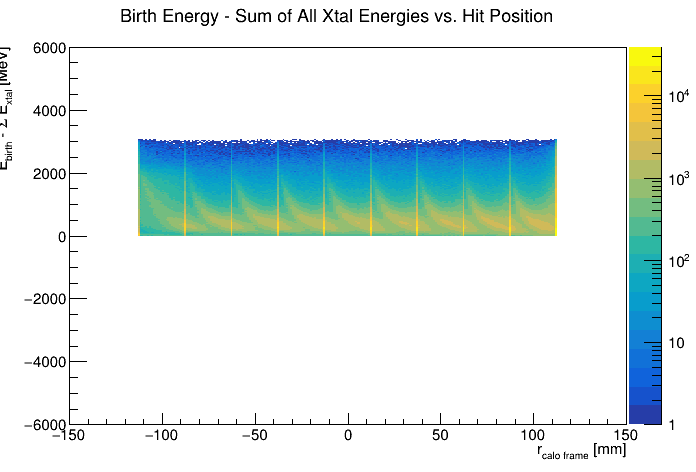

In [10]:
c = r.TCanvas()

h7 = r.TH2D("h7",
            "Birth Energy - Sum of All Xtal Energies vs. Hit Position; r_{calo frame} [mm];  E_{birth} - #Sigma E_{xtal} [MeV]",
            300,-150,150, 1200,-6000,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep):eCaloFrameR>>h7",
       "eCaloFlag == 0",
       "goff")
h7.Draw("colz")

c.SetLogz()
c.Draw()

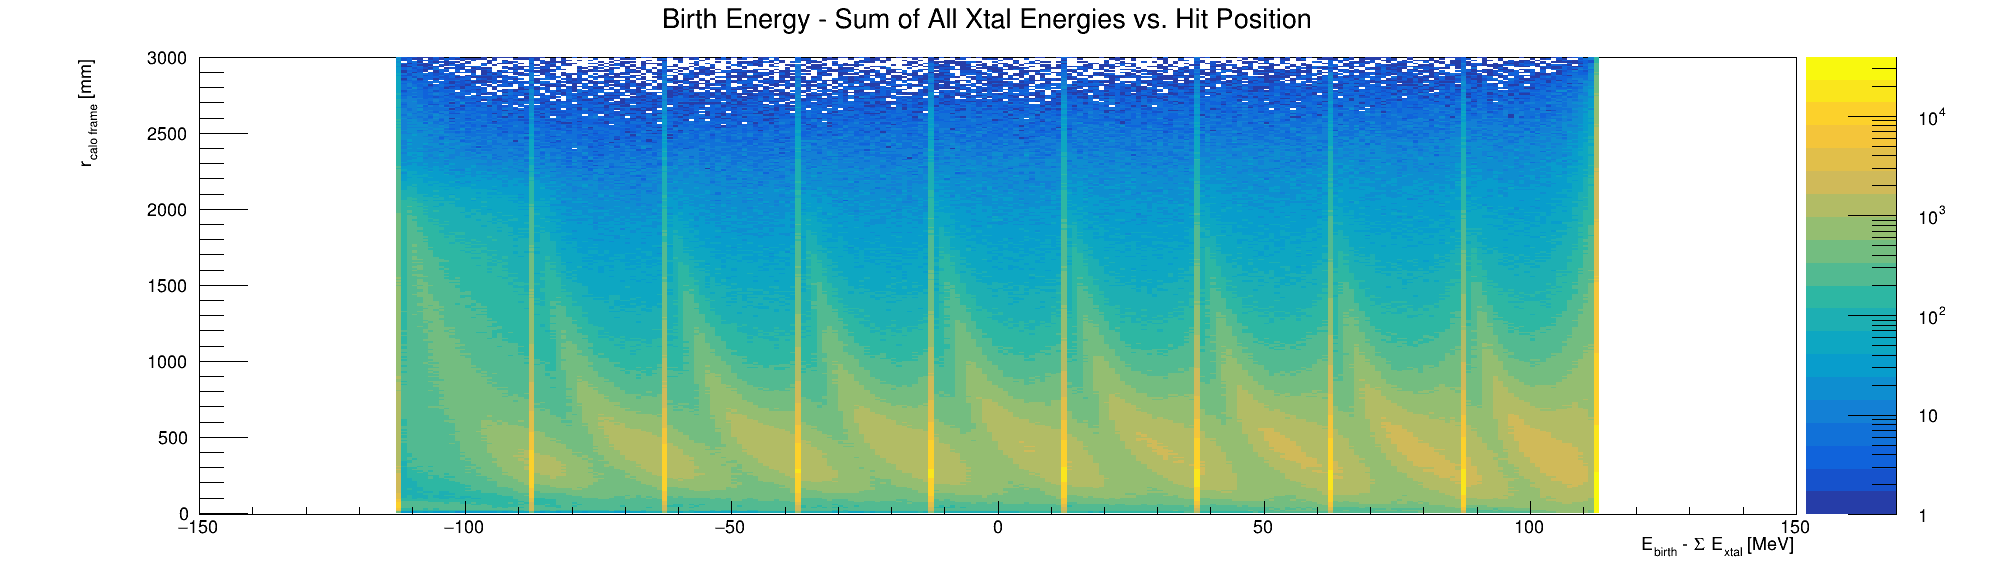

In [9]:
c = r.TCanvas("c","c",2000,600)

h7.GetYaxis().SetRangeUser(-1,3000)
h7.Draw("colz")

c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h72 (Potential memory leak).


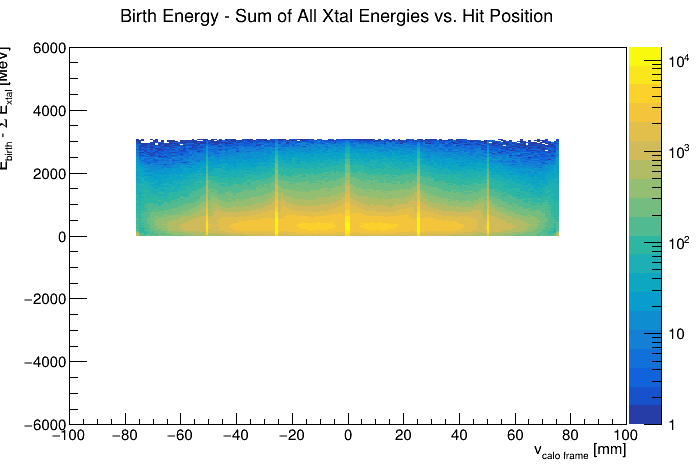

In [15]:
c = r.TCanvas()

h72 = r.TH2D("h72",
            "Birth Energy - Sum of All Xtal Energies vs. Hit Position; v_{calo frame} [mm];  E_{birth} - #Sigma E_{xtal} [MeV]",
            200,-100,100, 1200,-6000,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep):eCaloFrameV>>h72",
       "eCaloFlag == 0",
       "goff")
h72.Draw("colz")

c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h73 (Potential memory leak).


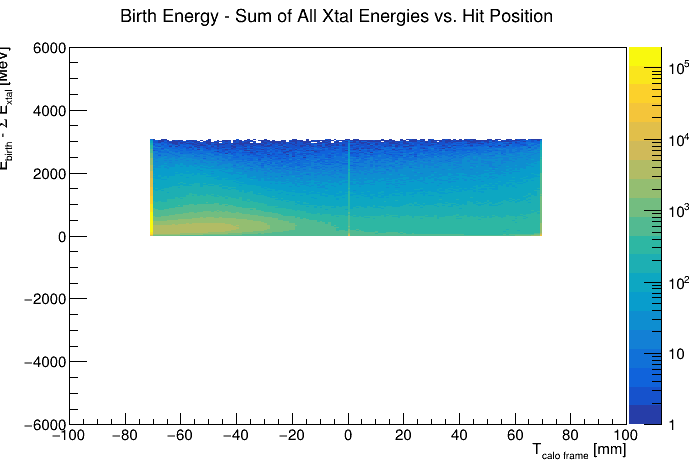

In [14]:
c = r.TCanvas()

h73 = r.TH2D("h73",
            "Birth Energy - Sum of All Xtal Energies vs. Hit Position; T_{calo frame} [mm];  E_{birth} - #Sigma E_{xtal} [MeV]",
            200,-100,100, 1200,-6000,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2) - Sum$(eCaloFrameEdep):eCaloFrameT>>h73",
       "eCaloFlag == 0",
       "goff")
h73.Draw("colz")

c.SetLogz()
c.Draw()

In [31]:
h8 = r.TH3D("h8",
            "Sum of All Xtal Energies / Birth Energy vs. Hit Position; r_{calo frame} [mm]; v_{calo frame} [mm];  E_{birth} - #Sigma E_{xtal} [MeV]",
            300,-150,150, 200,-100,100, 110,0,1.1)
t.Draw("Sum$(eCaloFrameEdep)/TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2):eCaloFrameV:eCaloFrameR>>h8",
       "eCaloFlag == 0 && eCaloFrameT < -60 ","")

17048537

Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).


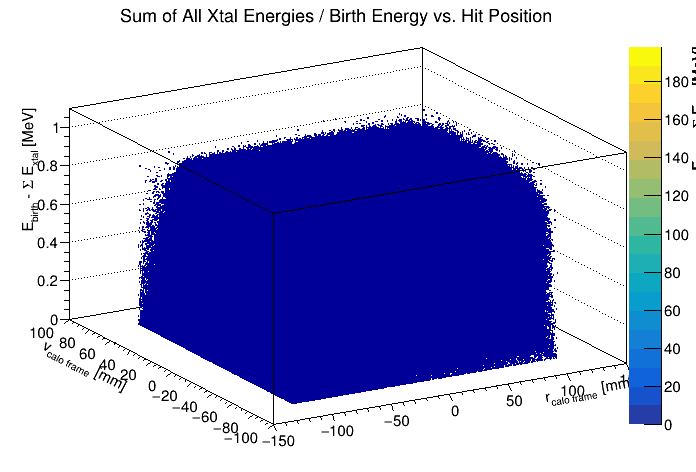

In [32]:
c = r.TCanvas()
h8.Draw("lego2z")
c.Draw()

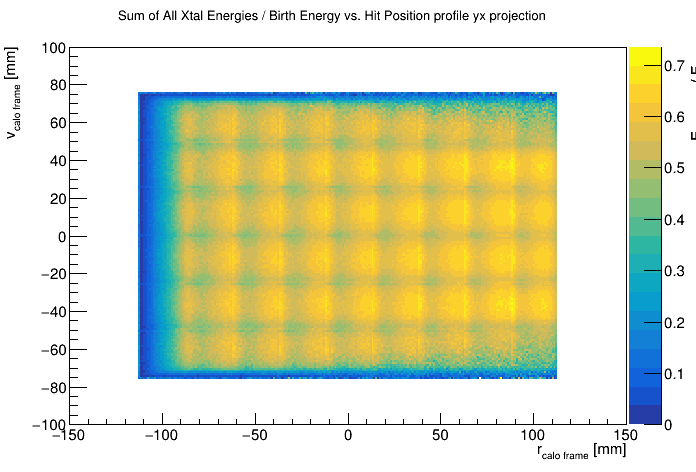

In [33]:
c = r.TCanvas()
h8_xy = h8.Project3DProfile("yx").Clone("h8_xy")
h8_xy.GetXaxis().SetTitle("r_{calo frame} [mm]")
h8_xy.GetYaxis().SetTitle("v_{calo frame} [mm]")
h8_xy.GetZaxis().SetTitle("E_{deposited} / E_{birth}")
h8_xy.Draw("colz")
#c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).


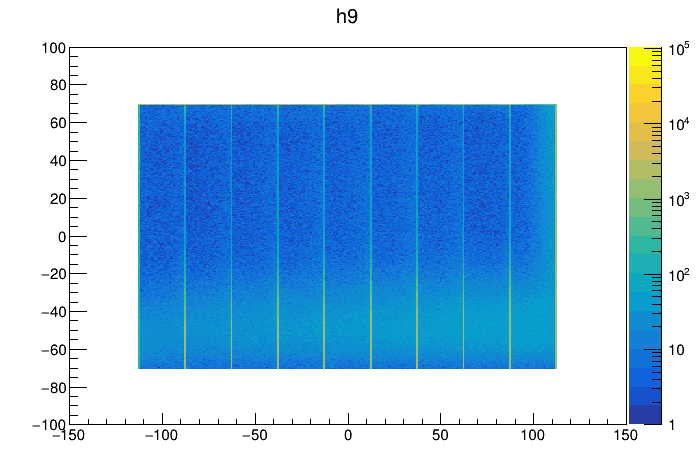

In [43]:
c = r.TCanvas()
h9 = r.TH2D("h9","h9",300,-150,150,2000,-100,100)
t.Draw("eCaloFrameT:eCaloFrameR>>h9","","goff")
h9.Draw("colz")
c.SetLogz()
c.Draw()

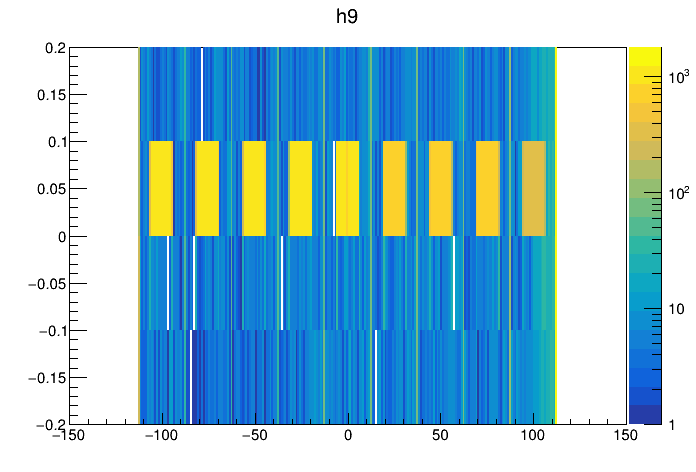

In [45]:
c = r.TCanvas()
h9.GetYaxis().SetRangeUser(-.2,.2)
h9.Draw("colz")
c.SetLogz()
c.Draw()

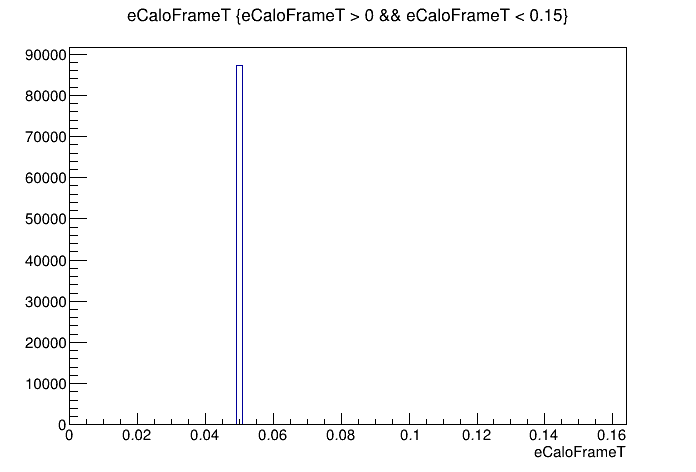

In [51]:
c = r.TCanvas()
t.Draw("eCaloFrameT","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.Draw()

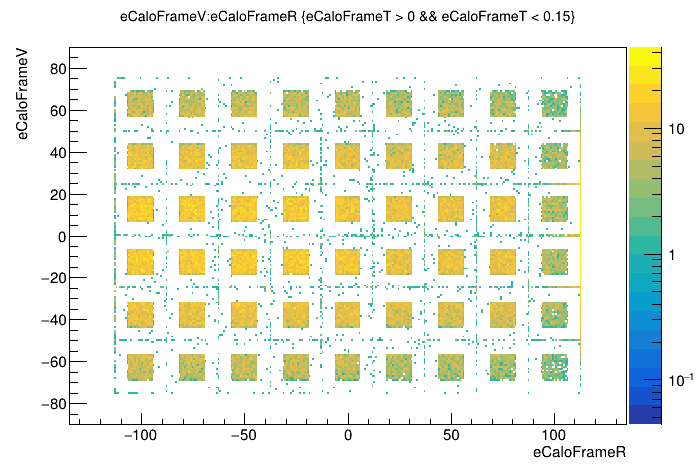

In [58]:
c = r.TCanvas()
t.Draw("eCaloFrameV:eCaloFrameR","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.SetLogz()
c.Draw()

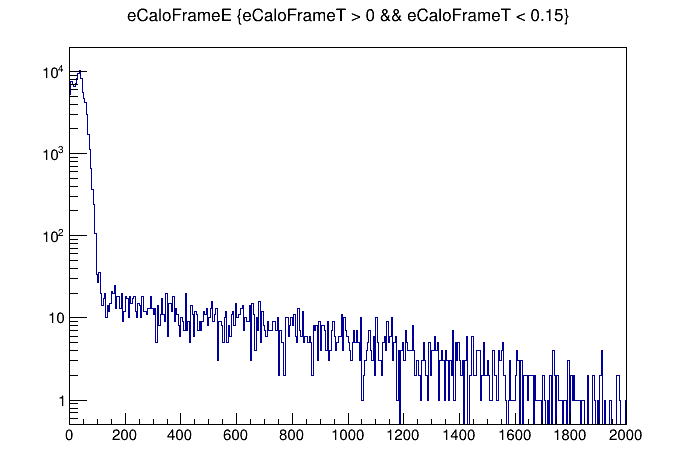

In [57]:
c = r.TCanvas()
t.Draw("eCaloFrameE>>hist(400,0,2000)","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.SetLogy()
c.Draw()

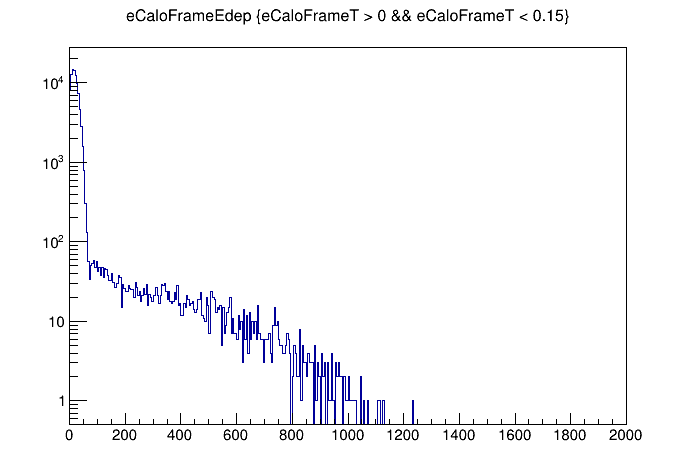

In [59]:
c = r.TCanvas()
t.Draw("eCaloFrameEdep>>hist(400,0,2000)","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.SetLogy()
c.Draw()

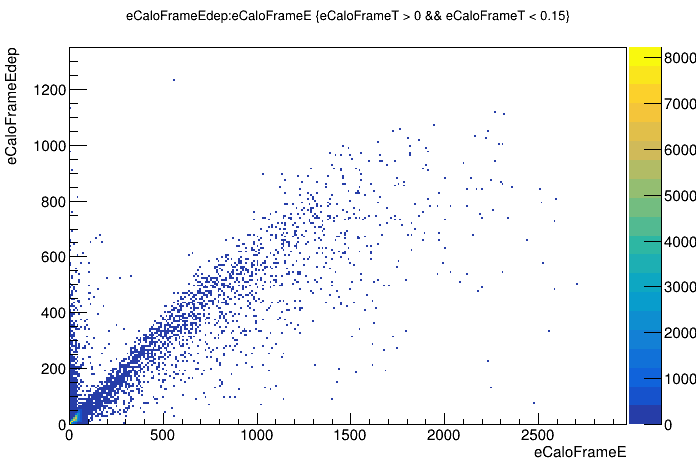

In [55]:
c = r.TCanvas()
t.Draw("eCaloFrameEdep:eCaloFrameE","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.Draw()

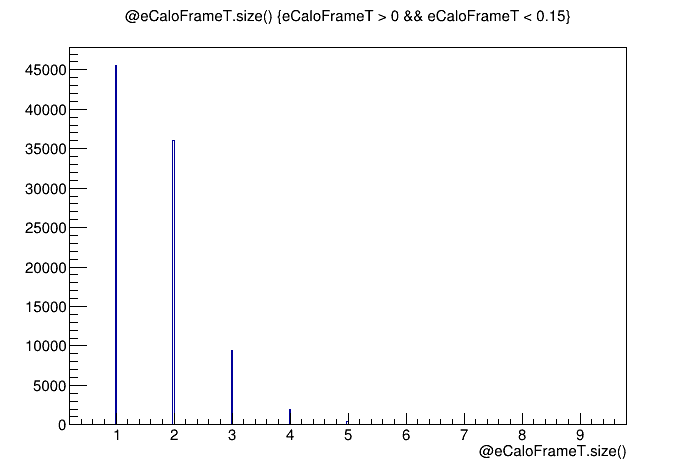

In [61]:
c = r.TCanvas()
t.Draw("@eCaloFrameT.size()","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.Draw()

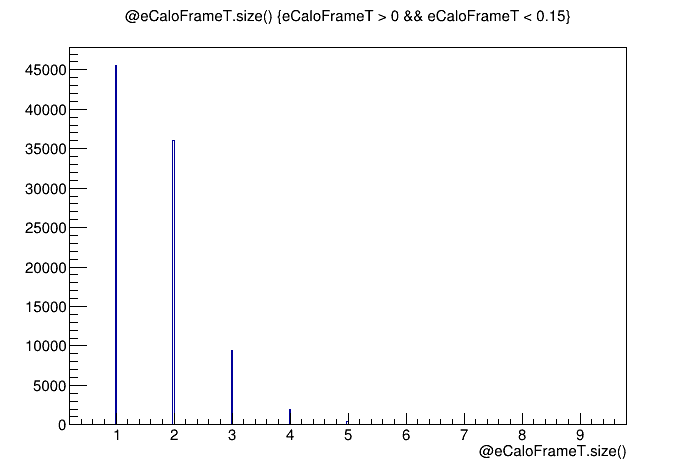

In [61]:
c = r.TCanvas()
t.Draw("@eCaloFrameXtal","eCaloFrameT > 0 && eCaloFrameT < 0.15","colz")
c.Draw()

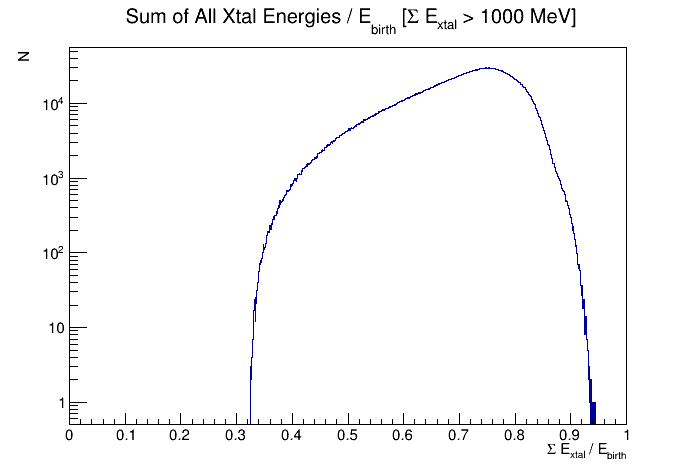

In [128]:
c = r.TCanvas()

h11 = r.TH1D("h11"," Sum of All Xtal Energies / E_{birth} [#Sigma E_{xtal} > 1000 MeV];  #Sigma E_{xtal} / E_{birth}; N ",1000,0,1)
t.Draw("Sum$(eCaloFrameEdep)/TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2)>>h11",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1000",
       "goff")
h11.Draw("colz")

c.SetLogy()
c.Draw()

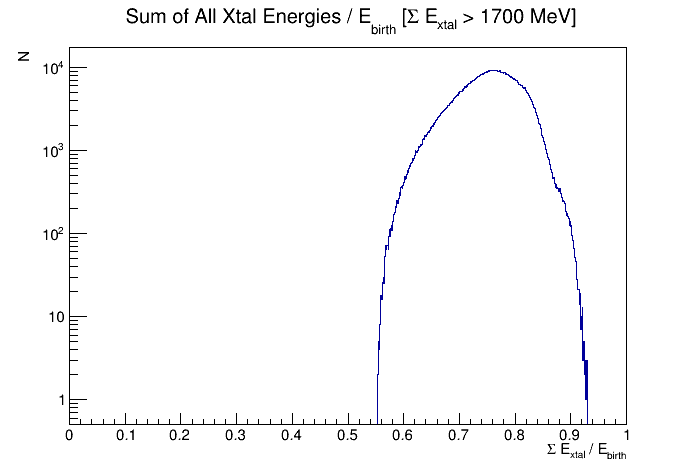

In [134]:
c = r.TCanvas()

h12 = r.TH1D("h12"," Sum of All Xtal Energies / E_{birth} [#Sigma E_{xtal} > 1700 MeV];  #Sigma E_{xtal} / E_{birth}; N ",1000,0,1)
t.Draw("Sum$(eCaloFrameEdep)/TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2)>>h12",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1700",
       "goff")
h12.Draw("colz")

c.SetLogy()
c.Draw()

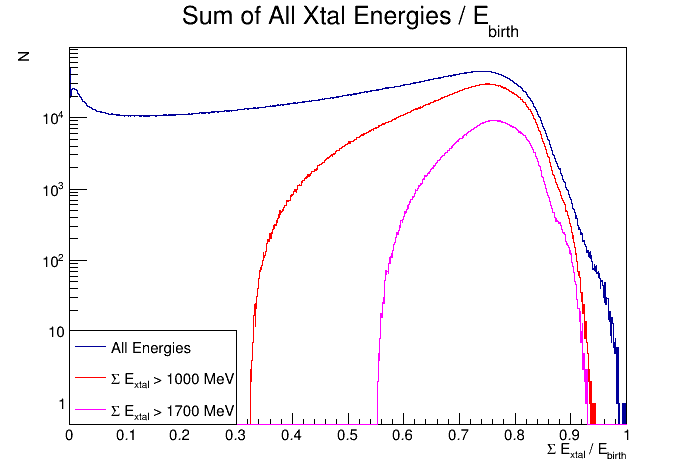

In [137]:
c = r.TCanvas()

h10.Draw()
h11.SetLineColor(2)
h11.Draw("same")
h12.SetLineColor(6)
h12.Draw("same")

leg = r.TLegend(0.1,0.1,0.34,0.3)
leg.AddEntry(h10,"All Energies","l")
leg.AddEntry(h11,"#Sigma E_{xtal} > 1000 MeV","l")
leg.AddEntry(h12,"#Sigma E_{xtal} > 1700 MeV","l")
leg.Draw()

c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).


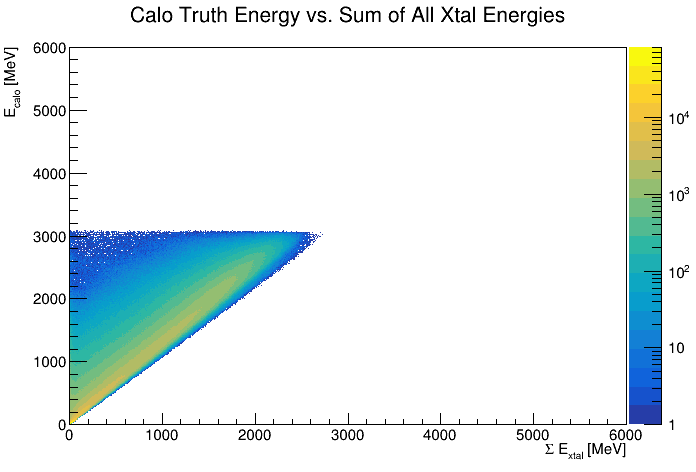

In [119]:
c = r.TCanvas()

h8 = r.TH2D("h8","Calo Truth Energy vs. Sum of All Xtal Energies; #Sigma E_{xtal} [MeV]; E_{calo} [MeV]",600,0,6000,600,0,6000)
t.Draw("eCaloE[0]:Sum$(eCaloFrameEdep)>>h8","eCaloFlag == 0","goff")
h8.Draw("colz")

fone.Draw("SAME")

c.SetLogz()
c.Draw()

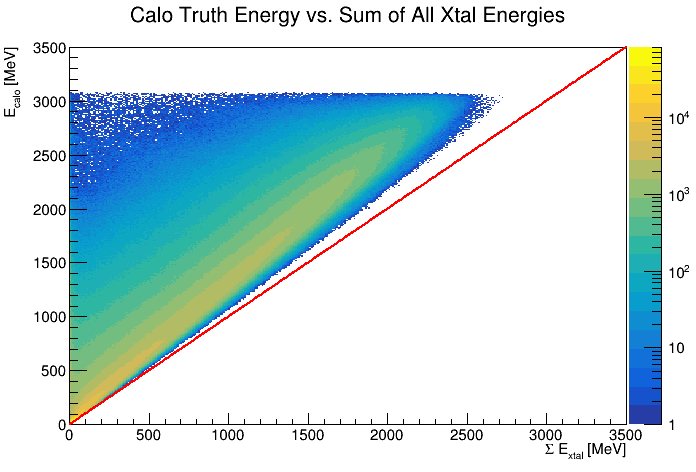

In [123]:
c = r.TCanvas()

h8.GetXaxis().SetRangeUser(0,3500)
h8.GetYaxis().SetRangeUser(0,3500)
h8.Draw("colz")

fone.Draw("SAME")

c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h9 (Potential memory leak).


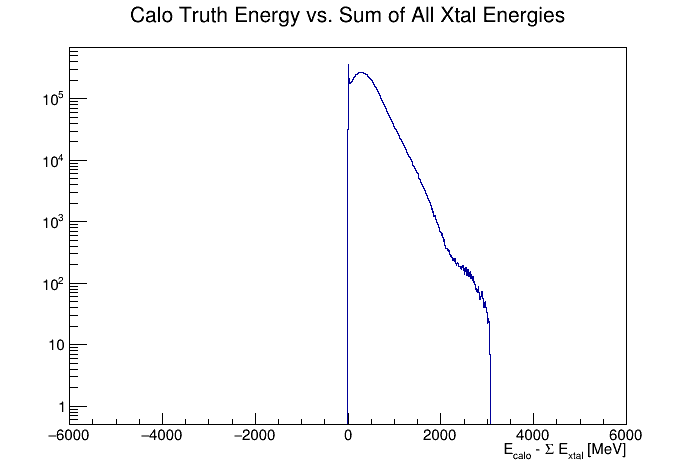

In [120]:
c = r.TCanvas()

h9 = r.TH1D("h9","Calo Truth Energy vs. Sum of All Xtal Energies;  E_{calo} - #Sigma E_{xtal} [MeV]",1200,-6000,6000)
t.Draw("eCaloE[0] - Sum$(eCaloFrameEdep)>>h9","eCaloFlag == 0","goff")
h9.Draw("colz")

c.SetLogy()
c.Draw()

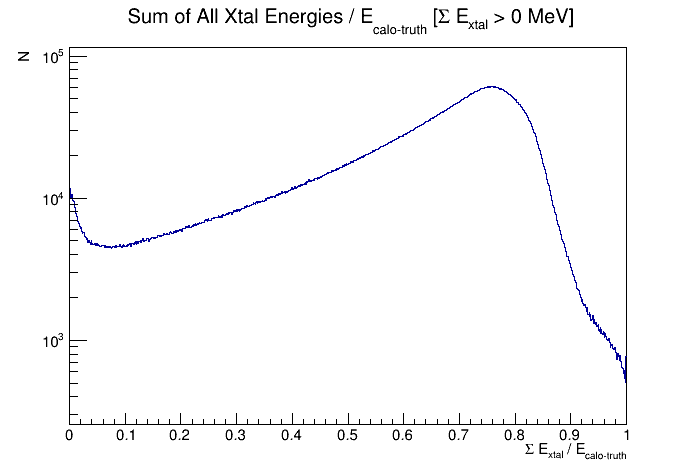

In [138]:
c = r.TCanvas()

h13 = r.TH1D("h13"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 0 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1000,0,1)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h13",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 0",
       "goff")
h13.Draw("colz")

c.SetLogy()
c.Draw()

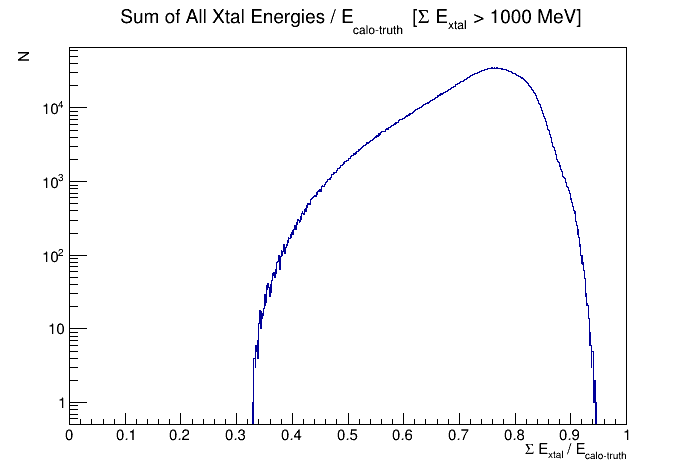

In [139]:
c = r.TCanvas()

h14 = r.TH1D("h14"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 1000 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1000,0,1)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h14",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1000",
       "goff")
h14.Draw("colz")

c.SetLogy()
c.Draw()

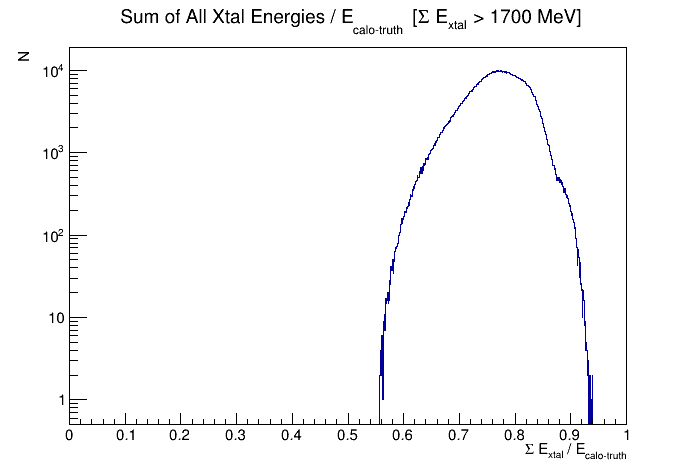

In [140]:
c = r.TCanvas()

h15 = r.TH1D("h15"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 1700 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1000,0,1)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h15",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1700",
       "goff")
h15.Draw("colz")

c.SetLogy()
c.Draw()

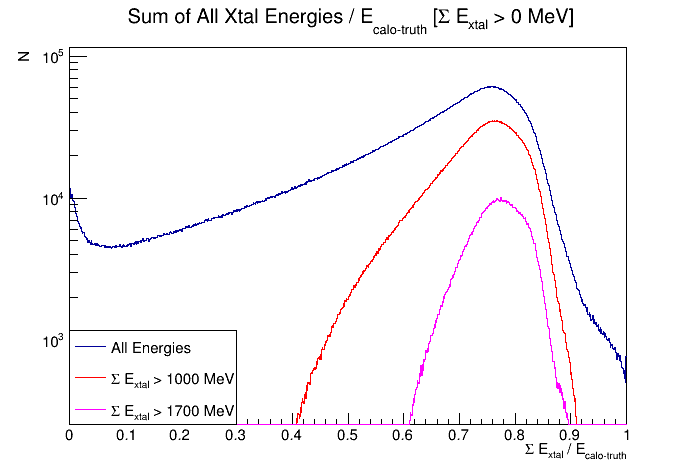

In [141]:
c = r.TCanvas()

h13.Draw()
h14.SetLineColor(2)
h14.Draw("same")
h15.SetLineColor(6)
h15.Draw("same")

leg = r.TLegend(0.1,0.1,0.34,0.3)
leg.AddEntry(h13,"All Energies","l")
leg.AddEntry(h14,"#Sigma E_{xtal} > 1000 MeV","l")
leg.AddEntry(h15,"#Sigma E_{xtal} > 1700 MeV","l")
leg.Draw()

c.SetLogy()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h16 (Potential memory leak).


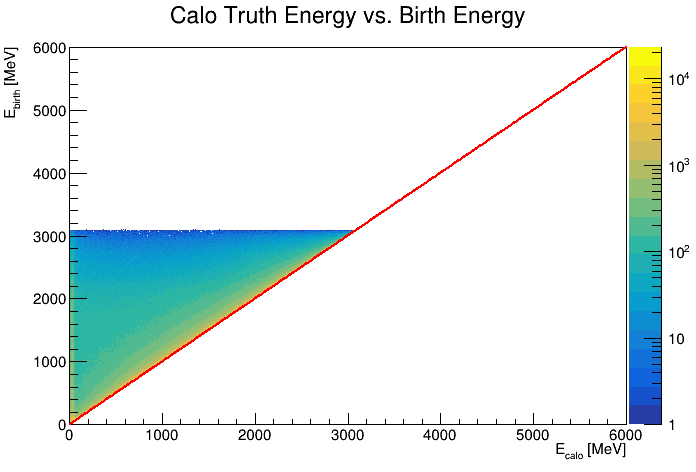

In [144]:
c = r.TCanvas()

h16 = r.TH2D("h16","Calo Truth Energy vs. Birth Energy; E_{calo} [MeV]; E_{birth} [MeV]",600,0,6000,600,0,6000)
t.Draw("TMath::Sqrt(eBirthPx**2+eBirthPz**2+eBirthPy**2):eCaloE[0]>>h16","eCaloFlag == 0","goff")
h16.Draw("colz")

fone.Draw("SAME")

c.SetLogz()
c.Draw()

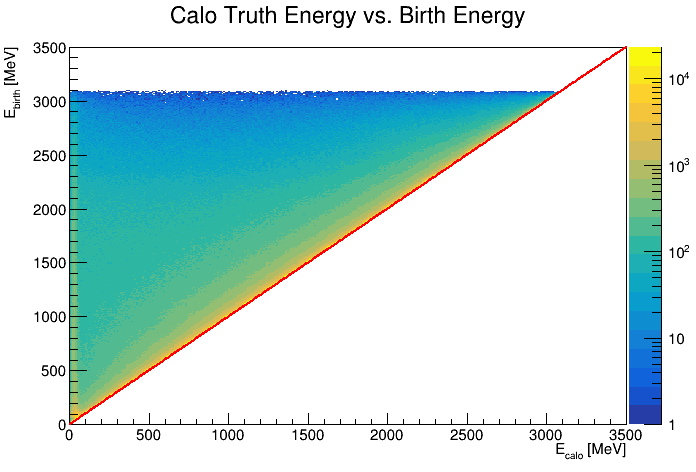

In [145]:
c = r.TCanvas()

h16.GetXaxis().SetRangeUser(0,3500)
h16.GetYaxis().SetRangeUser(0,3500)
h16.Draw("colz")

fone.Draw("SAME")

c.SetLogz()
c.Draw()

---

### lets shrink the volume of the available space and remake some of the plots above

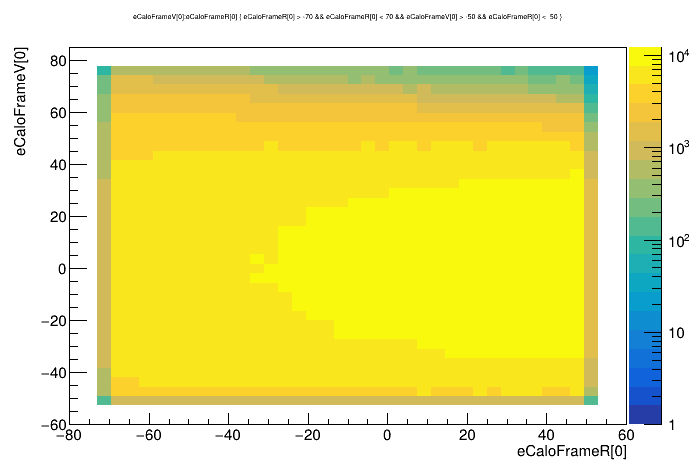

In [156]:
c = r.TCanvas()
condition = " eCaloFrameR[0] > -70 && eCaloFrameR[0] < 70 && eCaloFrameV[0] > -50 && eCaloFrameR[0] <  50 "
t.Draw("eCaloFrameV[0]:eCaloFrameR[0]",condition,"colz")
c.SetLogz()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h13 (Potential memory leak).


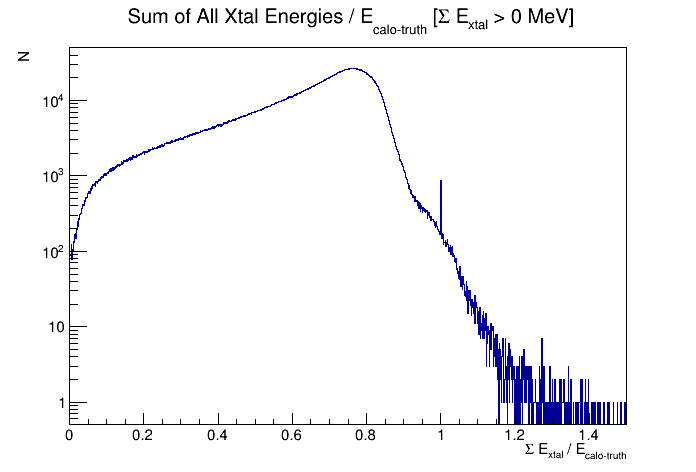

In [162]:
c = r.TCanvas()

h13 = r.TH1D("h13"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 0 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1500,0,1.5)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h13",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 0"+" && "+condition,
       "goff")
h13.Draw("colz")

c.SetLogy()
c.Draw()

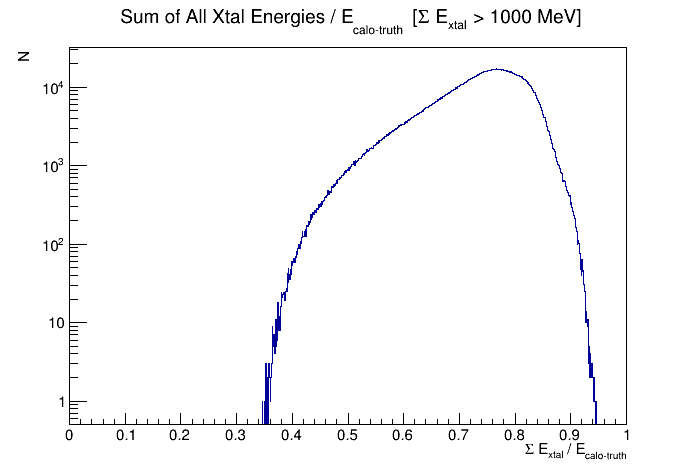

In [158]:
c = r.TCanvas()

h14 = r.TH1D("h14"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 1000 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1500,0,1.5)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h14",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1000"+" && "+condition,
       "goff")
h14.Draw("colz")

c.SetLogy()
c.Draw()

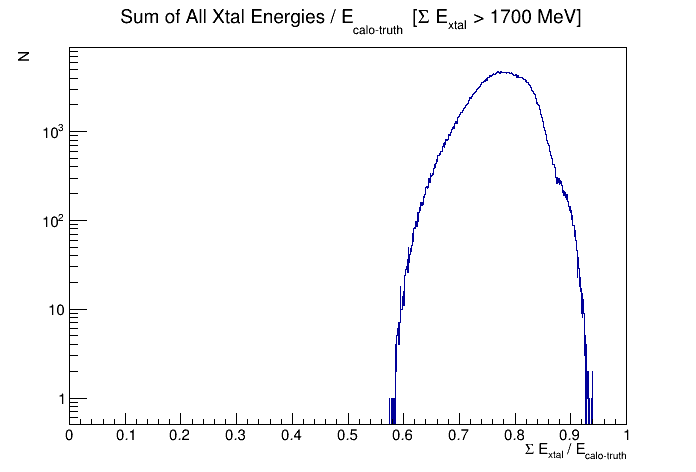

In [159]:
c = r.TCanvas()

h15 = r.TH1D("h15"," Sum of All Xtal Energies / E_{calo-truth} [#Sigma E_{xtal} > 1700 MeV];  #Sigma E_{xtal} / E_{calo-truth}; N ",1500,0,1.5)
t.Draw("Sum$(eCaloFrameEdep)/eCaloE[0]>>h15",
       "eCaloFlag == 0 && Sum$(eCaloFrameEdep) > 1700"+" && "+condition,
       "goff")
h15.Draw("colz")

c.SetLogy()
c.Draw()

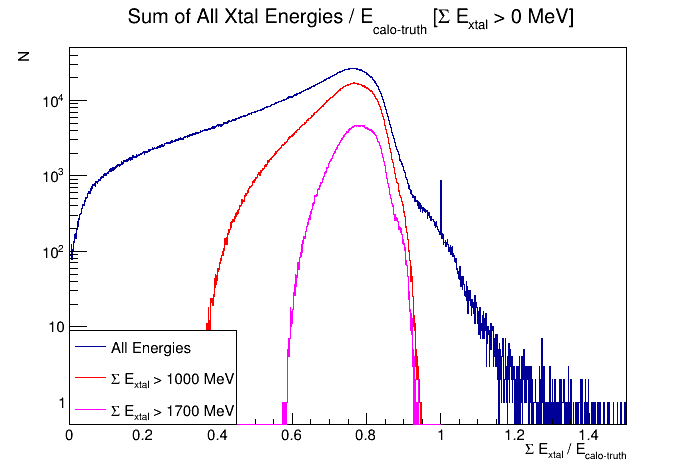

In [163]:
c = r.TCanvas()

h13.Draw()
h14.SetLineColor(2)
h14.Draw("same")
h15.SetLineColor(6)
h15.Draw("same")

leg = r.TLegend(0.1,0.1,0.34,0.3)
leg.AddEntry(h13,"All Energies","l")
leg.AddEntry(h14,"#Sigma E_{xtal} > 1000 MeV","l")
leg.AddEntry(h15,"#Sigma E_{xtal} > 1700 MeV","l")
leg.Draw()

c.SetLogy()
c.Draw()